Categories: airplane, bird X 
Train - 1000  images each;
Test - 190 images each;
valid - 50 each

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from fastai import *
from fastai.vision import *
from fastai.core import *

In [2]:
bs = 64 # batch size
img_size = 24 # image size

In [3]:
path = Path('./new1')
path.ls() # output >>> ['test', 'labels.txt', 'train']

[WindowsPath('new1/test'),
 WindowsPath('new1/train'),
 WindowsPath('new1/valid')]

In [4]:
data = ImageDataBunch.from_folder(path, train='train', valid='valid', test='test', ds_tfms=get_transforms(), size=224)

#data = ImageDataBunch.from_folder(path, ds_tfms=tfms, valid='test', size=img_size, bs = bs) 
# normalising the dataset using the same normalisation applied to the imagenet dataset


In [5]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList
y: CategoryList (2000 items)
[Category airplane, Category airplane, Category airplane, Category airplane, Category airplane]...
Path: new1
x: ImageItemList (2000 items)
[Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32)]...
Path: new1;

Valid: LabelList
y: CategoryList (100 items)
[Category airplane, Category airplane, Category airplane, Category airplane, Category airplane]...
Path: new1
x: ImageItemList (100 items)
[Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32)]...
Path: new1;

Test: LabelList
y: CategoryList (380 items)
[Category airplane, Category airplane, Category airplane, Category airplane, Category airplane]...
Path: new1
x: ImageItemList (380 items)
[Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32), Image (3, 32, 32)]...
Path: new1

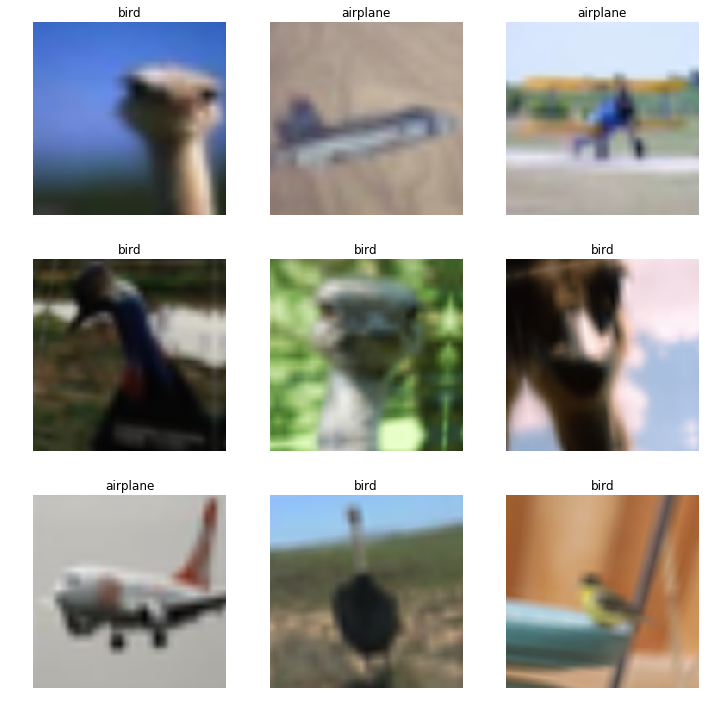

In [21]:
data.show_batch(rows=3, figsize=(10,10))

In [24]:
print(data.classes)
len(data.classes),data.c

['airplane', 'bird']


(2, 2)


ConvLearner has been replaced by creat_cnn in v1

https://towardsdatascience.com/transfer-learning-using-the-fastai-library-d686b238213e

documentation
https://docs.fast.ai/training.html

learn.fit_one_cycle(5) -  this will train the last 5 layers of the inbult Model 

we are going to use resnet34 model - 

https://medium.com/@14prakash/understanding-and-implementing-architectures-of-resnet-and-resnext-for-state-of-the-art-image-cf51669e1624

In [10]:
#learn = ConvLearner(data, models.resnet34, metrics=accuracy)
learn = create_cnn(data, models.resnet34, metrics=accuracy)


In [11]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy
1,0.384648,0.118741,0.960000


In [7]:
learn.fit_one_cycle(1) #error rate

epoch,train_loss,valid_loss,error_rate
1,0.382340,0.111992,0.050000


In [8]:
interp = ClassificationInterpretation.from_learner(learn)


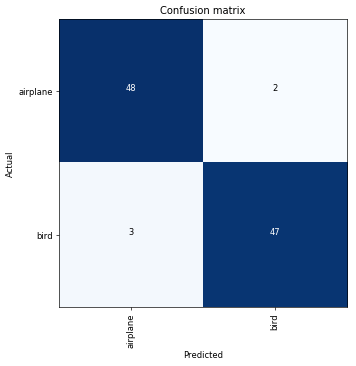

In [14]:
interp.plot_confusion_matrix(figsize=(8,6), dpi=60)

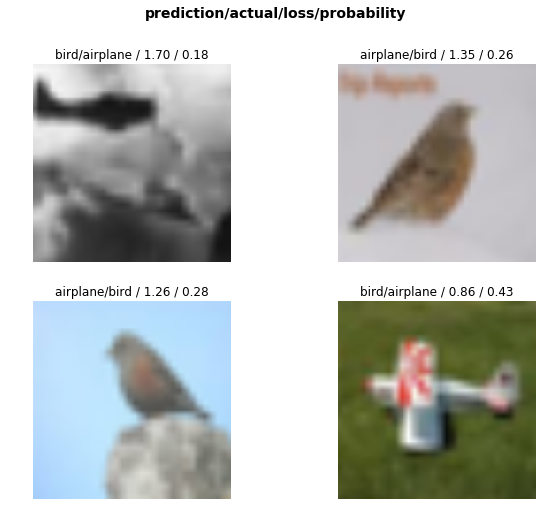

In [15]:
interp.plot_top_losses(4, figsize=(10,8))